In [429]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [430]:
# Red whine model

In [431]:
data_frame_red = pd.read_csv('C:\\Ieva\\Python_Bootcamp\\Task folder\\04.07.2023_tasks\\winequality-red.csv', delimiter=';', header=0)

In [432]:
data_frame_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [433]:
#  1) Calculate all the coeficients

In [434]:
x = data_frame_red.drop('quality', axis=1)
y = data_frame_red['quality']

In [435]:
x = sm.add_constant(x)

In [436]:
model = sm.OLS(y,x)
results = model.fit()

In [437]:
results.pvalues

const                   3.001921e-01
fixed acidity           3.356528e-01
volatile acidity        9.872361e-19
citric acid             2.149942e-01
residual sugar          2.764960e-01
chlorides               8.373953e-06
free sulfur dioxide     4.474495e-02
total sulfur dioxide    8.004610e-06
density                 4.086079e-01
pH                      3.100189e-02
sulphates               2.127228e-15
alcohol                 1.123029e-24
dtype: float64

In [439]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sat, 08 Jul 2023   Prob (F-statistic):          1.79e-145
Time:                        21:38:52   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [438]:
# 2) Calculate p-values.If any p-value is > 0.05, this mean we are not sure if the coeficient is significant(close to zero - does not have an impact on the target variable).
# In this case - remove the factor from the Linear regression equation and recalculate the results again. Check p-values, repeat the procedure if needed.

In [440]:
p_value_check = results.pvalues[results.pvalues <= 0.05].index.tolist()
if len(p_value_check) < x.shape[1]:
    x = x[p_value_check]

In [441]:
model = sm.OLS(y,x)
results = model.fit()

In [442]:
results.pvalues

volatile acidity        2.107112e-23
chlorides               3.657241e-02
free sulfur dioxide     4.058315e-01
total sulfur dioxide    5.824283e-03
pH                      2.463147e-24
sulphates               2.454276e-21
alcohol                 1.744099e-79
dtype: float64

In [ ]:
# After checking p-values there stayed 7 variables in model which makes impact on wine quality -volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulphates, alcohol.                                                   

In [ ]:
# Calculate rest of desriptive measures of the model (MSE, R-squared, etc.)

In [80]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.619e+04
Date:                Sat, 08 Jul 2023   Prob (F-statistic):                        0.00
Time:                        15:56:50   Log-Likelihood:                         -1629.0
No. Observations:                1599   AIC:                                      3272.
Df Residuals:                    1592   BIC:                                      3310.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -1.0581      0.104    -10.127      0.000      -1.263      -0.853
chlorides               -0.8301      0.397     -2.092      0.037      -1.608      -0.052
free sulfur dioxide      0.0018      0.002      0.831      0.406      -0.002       0.006
total sulfur dioxide    -0.0019      0.001     -2.761      0.006      -0.003      -0.001
pH                       0.6345      0.061     10.348      0.000       0.514       0.755
sulphates                1.0815      0.112      9.621      0.000       0.861       1.302
alcohol                  0.3365      0.017     19.988      0.000       0.304       0.370
==============================================================================
Omnibus:                       38.457   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.440
Skew:                          -0.215   Prob(JB):                     4.55e-14
Kurtosis:                       3.859   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
#  Based on them, provide the feeback on how good the model fits the data.

# After removing not significant variables R-squared value increased from 0.361 to 0.986. 
# It means that there is strong relationship between the variables and the quality of wine and the model ir realible.

# The model consists of 7 significant variables which makes impact on wine quality: volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulphates, and alcohol.
    
    
#  The impact of the variables on the quality of wine can be described following:

#     1) Volatile Acidity: For every unit increase in volatile acidity, the quality of wine is estimated to decrease by approximately 1.0581 units.

#     2) Chlorides: For every unit increase in chlorides, the quality of wine is estimated to decrease by approximately 0.8301 units.

#     3) Free Sulfur Dioxide: For every unit increase in free Sulfur Dioxide, the quality of wine is estimated to incerase by approximately 0.0018 units.

#     4) Total Sulfur Dioxide: For every unit increase in total sulfur dioxide, the quality of wine is estimated to decrease by approximately 0.0019 units.

#     5) pH: For every unit increase in pH, the quality of wine is estimated to increase by approximately 0.6345 units.

#     6) Sulphates: For every unit increase in sulphates, the quality of wine is estimated to increase by approximately 1.0815 units.

#     7) Alcohol: For every unit increase in alcohol, the quality of wine is estimated to increase by approximately 0.3365 units.

In [102]:
#  Calculate the predictions for some predictior values selected (up to you to select), provide the feedback.

predictor_values = pd.DataFrame({
    'volatile acidity': [0.6],
    'chlorides': [0.07],
    'free sulfur dioxide': [25],
    'total sulfur dioxide': [120],
    'pH': [3.2],
    'sulphates': [0.4],
    'alcohol': [12.7]})

predictions = results.predict(predictor_values)

print(predictions)


0    5.858679
dtype: float64


In [ ]:
# The prediction of 5,86 means that, based on the provided values
# for volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulphates, and alcohol, 
# the model predicts a quality score - 5,86. If I change the values of variables, the quality score of red wine changes.

In [ ]:
# Do a small analysis on the residuals (histogram, density plot and compare it to normal distribution plot)

In [84]:
print(residuals)
# Residuals are the differences between the actual values of the dependent variable and the predicted values from the regression model.

0      -0.147098
1       0.032007
2      -0.112438
3       0.512631
4      -0.147098
          ...   
1594   -0.613918
1595   -0.163976
1596   -0.056123
1597   -0.694532
1598   -0.135032
Length: 1599, dtype: float64


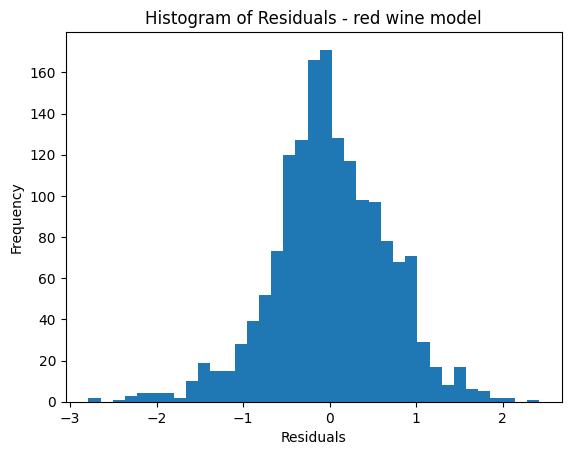

In [443]:
plt.hist(residuals, bins='auto')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals - red wine model')
plt.show()
 # A histogram and density plot of residuals shows the distribution and frequency of the residuals obtained from a regression model.

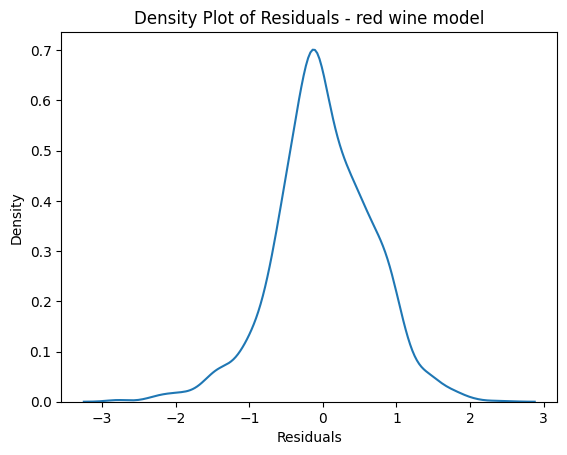

In [444]:
sns.kdeplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals - red wine model')
plt.show()

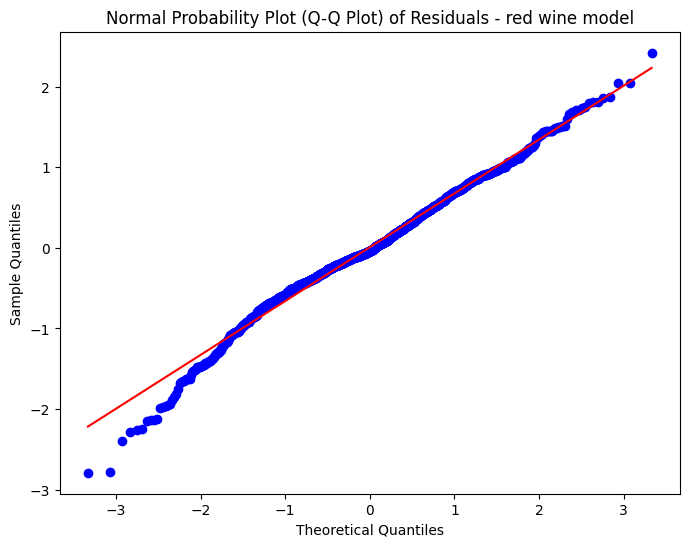

In [445]:
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Normal Probability Plot (Q-Q Plot) of Residuals - red wine model')
plt.show()
# A Normal Probability Plot (Q-Q Plot) of Residuals shows the normality of the residuals in a regression model. 
# As the points closely follow the diagonal line, it indicates that in red wine model model the residuals are normally distributed.

In [ ]:
#  White wine model

In [224]:
data_frame_white = pd.read_csv('C:\\Ieva\\Python_Bootcamp\\Task folder\\04.07.2023_tasks\\winequality-white.csv', delimiter=';', header=0)


In [307]:
data_frame_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [308]:
#  1) Calculate all the coeficients

In [335]:
a = data_frame_white.drop('quality', axis=1)
b = data_frame_white['quality']

In [336]:
a = sm.add_constant(a)

In [337]:
model = sm.OLS(b,a)
results = model.fit()

In [338]:
results.pvalues

const                   1.707781e-15
fixed acidity           1.706038e-03
volatile acidity        1.058005e-58
citric acid             8.175888e-01
residual sugar          5.298587e-27
chlorides               6.509735e-01
free sulfur dioxide     9.994821e-06
total sulfur dioxide    4.497912e-01
density                 4.044493e-15
pH                      8.102311e-11
sulphates               3.440472e-10
alcohol                 1.699500e-15
dtype: float64

In [339]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:26:13   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [340]:
# The density has too large deviation in the data, so I think this variable is not reliable and I removed it
a_updated = data_frame_white.drop(['density'], axis=1)

In [341]:
# 2) Calculate p-values.If any p-value is > 0.05, this mean we are not sure if the coeficient is significant(close to zero - does not have an impact on the target variable).
# In this case - remove the factor from the Linear regression equation and recalculate the results again. Check p-values, repeat the procedure if needed.


In [342]:
p_value_check = results.pvalues.drop(['const', 'density']).loc[results.pvalues <= 0.05].index.tolist()

if len(p_value_check) < a_updated.shape[1]:
    a_updated = a_updated[p_value_check]

In [343]:
a_updated = sm.add_constant(a_updated)

In [344]:
model = sm.OLS(b,a_updated)
results = model.fit()

In [346]:
results.pvalues

const                   2.123673e-08
fixed acidity           9.898723e-05
volatile acidity        2.698986e-75
residual sugar          1.052340e-23
free sulfur dioxide     1.918856e-07
pH                      5.998550e-02
sulphates               7.014017e-05
alcohol                1.219809e-272
dtype: float64

In [347]:
# After checking p-values there stayed 7 variables in model which makes impact on wine quality.

In [348]:
# Calculate rest of desriptive measures of the model (MSE, R-squared, etc.)

In [349]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     260.2
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:27:38   Log-Likelihood:                -5579.3
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4890   BIC:                         1.123e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.8921      0.337      5.611      0.000       1.231       2.553
fixed acidity          -0.0556      0.014     -3.896      0.000      -0.084      -0.028
volatile acidity       -2.0344      0.109    -18.683      0.000      -2.248      -1.821
residual sugar          0.0252      0.003     10.089      0.000       0.020       0.030
free sulfur dioxide     0.0036      0.001      5.215      0.000       0.002       0.005
pH                      0.1533      0.081      1.881      0.060      -0.006       0.313
sulphates               0.3832      0.096      3.979      0.000       0.194       0.572
alcohol                 0.3776      0.010     37.650      0.000       0.358       0.397
==============================================================================
Omnibus:                      106.791   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.138
Skew:                           0.071   Prob(JB):                     2.89e-50
Kurtosis:                       4.048   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [324]:
#  Based on them, provide the feeback on how good the model fits the data.

# The R-squared value of 0.27 indicates that approximately 27% of the variance in wine quality can be explained by the predictor variables included in the model.
# It means that there are some other factors in data model which affects the model.

    
#  The impact of the variables on the quality of wine can be described following:

#     1) Fixed acidity: For every unit increase in fixed  acidity, the quality of wine is estimated to decrease by approximately 0.0556 units.

#     2) Volatile acidity: For every unit increase in volatile acidity, the quality of wine is estimated to decrease by approximately 2.0344 units.

#     3) Residual sugar: For every unit increase in free residual sugar, the quality of wine is estimated to incerase by approximately 0.0252 units.

#     4) Total free Dioxide: For every unit increase in total free sulfur dioxide, the quality of wine is estimated to decrease by approximately 0.0036 units.

#     5) pH: For every unit increase in pH, the quality of wine is estimated to increase by approximately 0.1533 units.

#     6) Sulphates: For every unit increase in sulphates, the quality of wine is estimated to increase by approximately 0.3832 units.

#     7) Alcohol: For every unit increase in alcohol, the quality of wine is estimated to increase by approximately 0.3776 units.



In [457]:
#  Calculate the predictions for some predictior values selected (up to you to select), provide the feedback.

predictor_values = pd.DataFrame({
    'fixed acidity': [8.3],
    'volatile acidity': [0.6],
    'residual sugar': [0.1],
    'free sulfur dioxide': [10],
    'pH': [1.2],
    'sulphates': [0.65],
    'alcohol': [8.0]})

predictions = results.predict(predictor_values)

print(predictions)


0   -5.142642
dtype: float64


In [458]:
# the model predicts a quality score - 5,14.
# Considering that the quality of the wine in the model is estimated between 4-7, predicted value may not be meaningful or accurate, as it falls outside the expected range

In [460]:
# Do a small analysis on the residuals (histogram, density plot and compare it to normal distribution plot)

In [461]:
print(residuals)
# Residuals are the differences between the actual values of the dependent variable and the predicted values from the regression model.

0      -0.147098
1       0.032007
2      -0.112438
3       0.512631
4      -0.147098
          ...   
1594   -0.613918
1595   -0.163976
1596   -0.056123
1597   -0.694532
1598   -0.135032
Length: 1599, dtype: float64


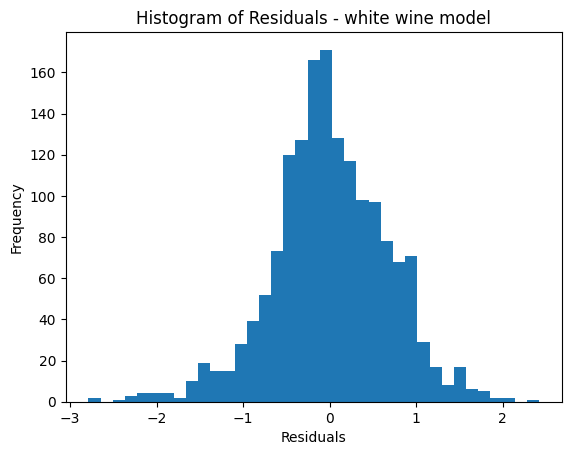

In [465]:
plt.hist(residuals, bins='auto')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals - white wine model')
plt.show()
 # A histogram and density plot of residuals shows the distribution and frequency of the residuals obtained from a regression model.

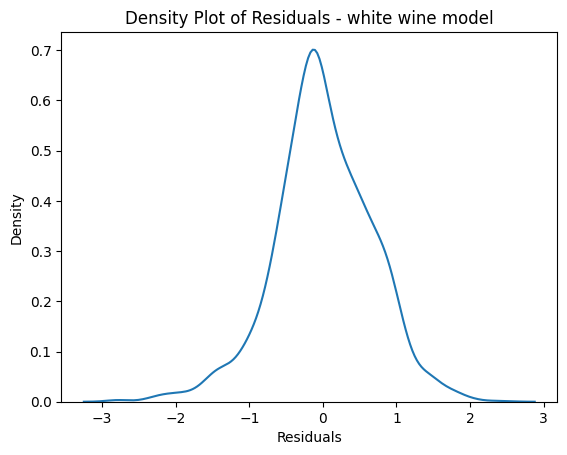

In [466]:
sns.kdeplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals - white wine model')
plt.show()

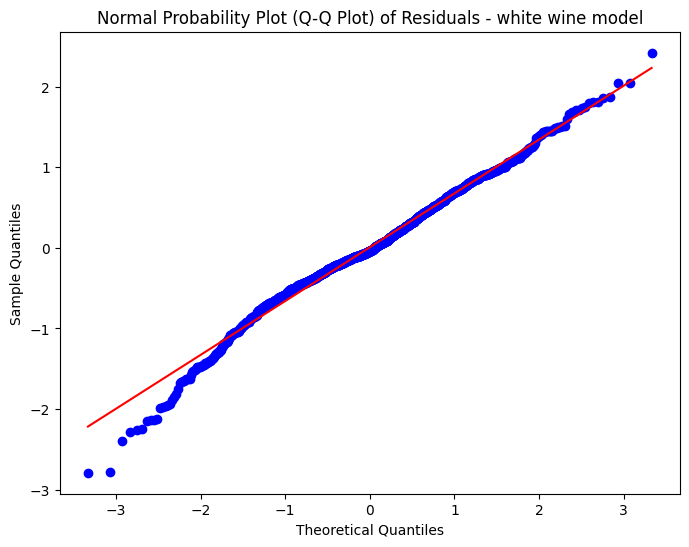

In [467]:
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Normal Probability Plot (Q-Q Plot) of Residuals - white wine model')
plt.show()
# A Normal Probability Plot (Q-Q Plot) of Residuals shows the normality of the residuals in a regression model. 
# As the points closely follow the diagonal line, it indicates that in red wine model model the residuals are normally distributed.

In [468]:
# Water temperature model

In [469]:
data_frame = pd.read_csv('C:\\Ieva\\Python_Bootcamp\\Task folder\\04.07.2023_tasks\\bottle.csv')

C:\Users\37129\AppData\Local\Temp\ipykernel_12704\3870567848.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv('C:\\Ieva\\Python_Bootcamp\\Task folder\\04.07.2023_tasks\\bottle.csv')


In [470]:
data_frame

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,...,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [471]:
salt_degree=data_frame[['Depthm', 'Salnty', 'T_degC']]

In [472]:
salt_degree

,Depthm,Salnty,T_degC
0,0,33.4400,10.500
1,8,33.4400,10.460
2,10,33.4370,10.460
3,19,33.4200,10.450
4,20,33.4210,10.450
...,...,...,...
864858,0,33.4083,18.744
864859,2,33.4083,18.744
864860,5,33.4150,18.692
864861,10,33.4062,18.161


In [473]:
#  1) Calculate all the coeficients

In [474]:
x = salt_degree.drop('T_degC', axis=1)
y = salt_degree['T_degC']

In [475]:
x = sm.add_constant(x)

In [476]:
salt_degree_cleaned = salt_degree.replace([np.inf, -np.inf], np.nan).dropna(subset=['T_degC', 'Depthm', 'Salnty'])

x_1 = salt_degree_cleaned[['Depthm', 'Salnty']] 
y = salt_degree_cleaned['T_degC'] 


In [477]:
model = sm.OLS(y, sm.add_constant(x_1))
results = model.fit()


In [478]:
results.pvalues

const     0.0
Depthm    0.0
Salnty    0.0
dtype: float64

In [479]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 T_degC   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                 3.732e+05
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:21:49   Log-Likelihood:            -2.0638e+06
No. Observations:              814247   AIC:                         4.128e+06
Df Residuals:                  814244   BIC:                         4.128e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.8806      0.301    222.344      0.000      66.291      67.470
Depthm        -0.0079   1.34e-05   -589.934      0.000      -0.008      -0.008
Salnty        -1.6037      0.009   -179.424      0.000      -1.621      -1.586
==============================================================================
Omnibus:                   327219.745   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1649620.512
Skew:                           1.908   Prob(JB):                         0.00
Kurtosis:                       8.837   Cond. No.                     3.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [480]:
#  Based on them, provide the feeback on how good the model fits the data.


# This linear regression model aims to predict the dependent variable - water temperature (T_degC) based on the variables depth and saltiness of water.

# The R-squared value of 0.478 indicates that approximately 48% of the variation in the dependent variable can be explained by the independent variables in the model. 
# It means that there are some more factors that affects water temperature.

# Linear regression model suggests that both depth and saltiness of water are significant predictors of the water temperature, as indicated by their low p-values.
# The model explains approximately 48% of the variation in the temperature.

# The impact of the variables on the water temperature can be described following:

#     1) Depth: For every meter increase in depth, the water temperature is estimated to decrease by approximately 0.0079C.

#     2) saltiness: For every unit increase in saltiness, the water temperature is estimated to decrease by approximately 1.6037 units.


In [481]:
#  Calculate the predictions for some predictior values selected (up to you to select), provide the feedback.

predictor_values = pd.DataFrame({
    'const': [1],
    'Depthm': [12],
    'Salnty': [33.6]
})
predictions = results.predict(predictor_values)

print(predictions)


0    12.902879
dtype: float64


In [407]:
# The prediction of 12,9 means that, based on the provided values - depth and saltiness the model predicts water temperature 12,9 C. 

In [408]:
# Do a small analysis on the residuals (histogram, density plot and compare it to normal distribution plot)

In [409]:
print(residuals)

0      -0.147098
1       0.032007
2      -0.112438
3       0.512631
4      -0.147098
          ...   
1594   -0.613918
1595   -0.163976
1596   -0.056123
1597   -0.694532
1598   -0.135032
Length: 1599, dtype: float64


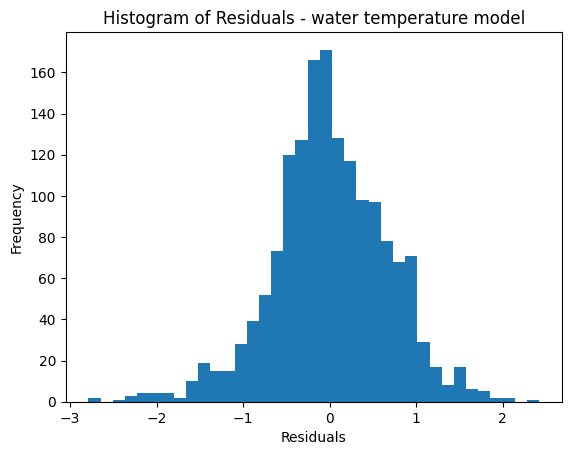

In [482]:
plt.hist(residuals, bins='auto')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals - water temperature model')
plt.show()

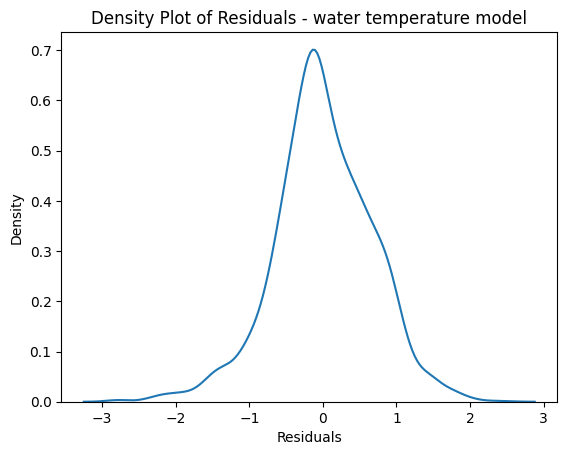

In [483]:
sns.kdeplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals - water temperature model')
plt.show()

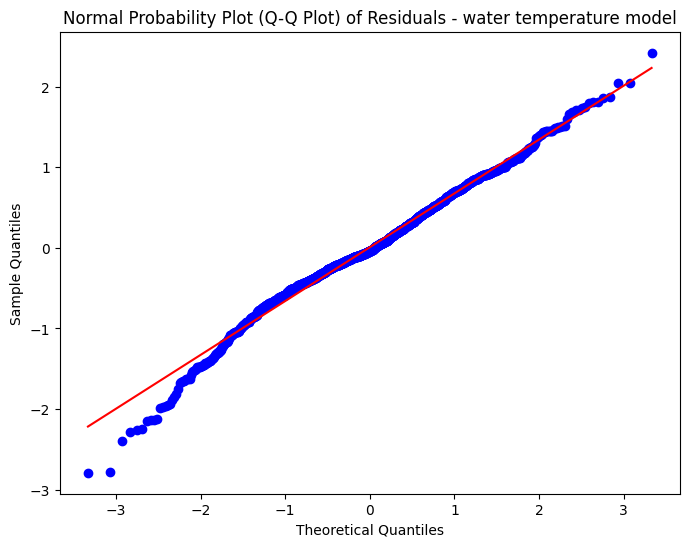

In [484]:
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Normal Probability Plot (Q-Q Plot) of Residuals - water temperature model')
plt.show()

# As the points closely follow the diagonal line, it indicates that in water temperature model the residuals are normally distributed.